In [1]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(100_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt
import time
from zoneinfo import ZoneInfo

import rt_analysis as rt
import importlib

import gcsfs
fs = gcsfs.GCSFileSystem()

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
E0324 15:27:37.367015004     961 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0324 15:27:40.310585769     961 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


In [2]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [3]:
bbb_itp_id = 300

In [4]:
analysis_date = dt.date(2022, 2, 8)

In [5]:
pbar = tqdm()

0it [00:00, ?it/s]

In [6]:
bbb = rt.OperatorDayAnalysis(bbb_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
863240
861367
861866
864403
861814
861363
863331
861362
861359
861888
861868
862775
862703
862234
862088
861811
862243
862478
862710
863073
861380
861358
863034
861822
862082
863245
863317
861014
862701
861854
861780
863247
861366
863244
861880
861044
861813
863249
863318
862072
861364
863226
861812
863516
863174
863202
860967
861843
862405
861817
861816
861887
862242
863518
861385
861365
861361
863315
863298
863319


/opt/conda/lib/python3.9/site-packages/siuba/sql/utils.py:52: SAWarning: Dialect bigquery:bigquery will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)


In [7]:
bbb.rt_trips >> head(3)

,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,route_short_name,median_time,direction,mean_speed_mph
0,300,0,2022-02-08,-3880794432110418766,863274,3369,1,25468,2021-12-06,2022-03-08,R3,07:04:08,Eastbound,13.530882
1,300,0,2022-02-08,-6981635930623604545,863227,3369,0,25467,2021-12-06,2022-03-08,R3,17:03:52,Westbound,13.569099
2,300,0,2022-02-08,8604654890119505412,863271,3369,1,25468,2021-12-06,2022-03-08,R3,12:44:21,Eastbound,7.344299


In [23]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': None, 'shape_ids': None, 'direction_id': None, 'direction': None}


In [8]:
# rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00', route_names=['1', '3', 'R12'])

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1', '3', 'R12'], 'shape_ids': None, 'direction_id': None, 'direction': None}


In [ ]:
m = rt.OperatorDayAnalysis.segment_speed_map(bbb)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': None, 'shape_ids': None, 'direction_id': None, 'direction': None}
25423_1_ empty!
25424_1_ empty!
25470_1_ empty!
25469_1_ empty!
25465_0_ empty!
25429_1_ empty!
25404_1_ empty!
25444_1_ empty!
25418_1_ empty!
25420_1_ empty!
25456_0_ empty!
25461_0_ empty!
25460_1_ empty!
25434_1_ empty!
25431_0_ empty!
25458_0_ empty!
25468_0_ empty!
25467_1_ empty!
25419_0_ empty!
25427_0_ empty!


In [ ]:
m

In [16]:
rt.OperatorDayAnalysis.set_filter(bbb, start_time='15:00', end_time='19:00', shape_ids=['25446'], direction_id='1')

{'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['R12'], 'shape_ids': ['25446'], 'direction_id': '1', 'direction': 'Southbound'}


In [17]:
# bbb.set_filter(start_time='15:00', end_time='19:00', shape_ids=['25404'], direction_id='0')

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['R12'], 'shape_ids': ['25446'], 'direction_id': '1', 'direction': 'Southbound'}


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


Text(0.5, 1.0, 'Big Blue Bus Speed Variability by Stop Segment, Route(s) R12, Southbound, PM Peak, Feb 08 (Tue)')

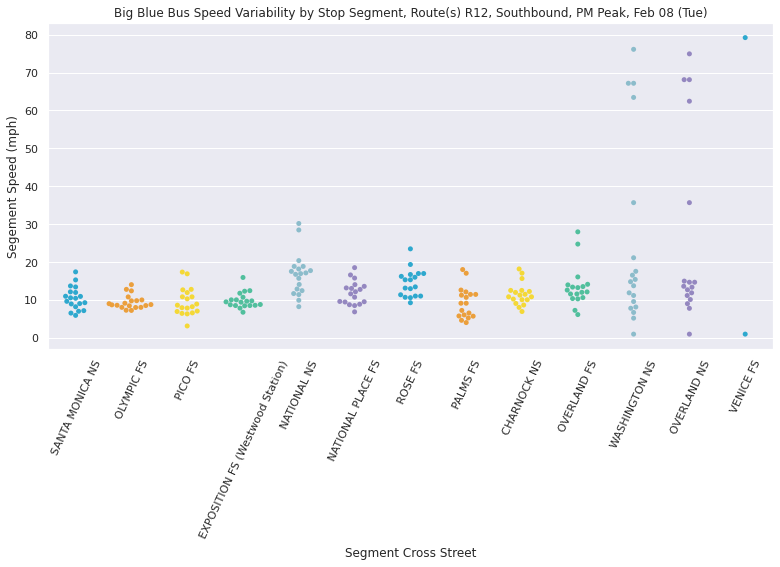

In [20]:
rt.OperatorDayAnalysis.chart_variability(bbb, min_stop_seq = 5, max_stop_seq = 30)

In [14]:
bbb.position_interpolators['860694']['rt'].direction

'Northbound'

In [15]:
bbb._filter(bbb.rt_trips)

view filter: {'start_time': datetime.time(15, 0), 'end_time': datetime.time(19, 0), 'route_names': ['1'], 'shape_ids': ['25404'], 'direction_id': '0', 'direction': 'Northbound'}


,calitp_itp_id,calitp_url_number,service_date,trip_key,trip_id,route_id,direction_id,shape_id,calitp_extracted_at,calitp_deleted_at,route_short_name,median_time,direction,mean_speed_mph
0,300,0,2022-02-08,9189496404936817804,860694,3353,0,25404,2021-12-06,2022-03-08,1,15:46:19.500000,Northbound,6.010434
1,300,0,2022-02-08,-3054465324703039246,860702,3353,0,25404,2021-12-06,2022-03-08,1,17:11:19,Northbound,6.487212
2,300,0,2022-02-08,5817864788633008922,860713,3353,0,25404,2021-12-06,2022-03-08,1,17:46:35,Northbound,7.103820
3,300,0,2022-02-08,972988220055993101,860714,3353,0,25404,2021-12-06,2022-03-08,1,18:01:13,Northbound,6.273718
4,300,0,2022-02-08,-1360799802736523785,860693,3353,0,25404,2021-12-06,2022-03-08,1,15:43:13,Northbound,5.887252
5,300,0,2022-02-08,6273108700257837027,860718,3353,0,25404,2021-12-06,2022-03-08,1,18:59:09,Northbound,8.431785
6,300,0,2022-02-08,5649523177058113349,860715,3353,0,25404,2021-12-06,2022-03-08,1,18:17:57,Northbound,6.492155
7,300,0,2022-02-08,5096104807605464446,860704,3353,0,25404,2021-12-06,2022-03-08,1,17:39:19,Northbound,9.701092
8,300,0,2022-02-08,410095616705037738,860717,3353,0,25404,2021-12-06,2022-03-08,1,18:43:12,Northbound,7.221804
9,300,0,2022-02-08,3507325484027120510,860695,3353,0,25404,2021-12-06,2022-03-08,1,16:01:18,Northbound,6.567387


### Cleaning and Formatting!
   * some sort of stop formatting? beyond optionally splitting on &?

### Files for self-serve

In [22]:
bbb.rt_trips.to_parquet('./temp/rt_trips.parquet')

In [ ]:
bbb.stop_segment_speed_view.to